# (Analysis of Proposer Loan Data)
## by (Sarah Alhomoud)

## Investigation Overview

> The main goal of this project is to study the characteristics of diffrent loan variables that may affect the borrowers. And to know more about the borrower background and match it other factors. Moreover, to show the relationships among multiple variables via data visualizations.

## Dataset Overview

> This financial data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Current loan status, borrower income, and many others. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

## (The 10 top number of listing in each Borrower States)

> As we can notice CA takes the first place in the borrower states by more than 14,000 listing, then TX , NY almost in the same positions , which match what mentioned about the population rank in the US.

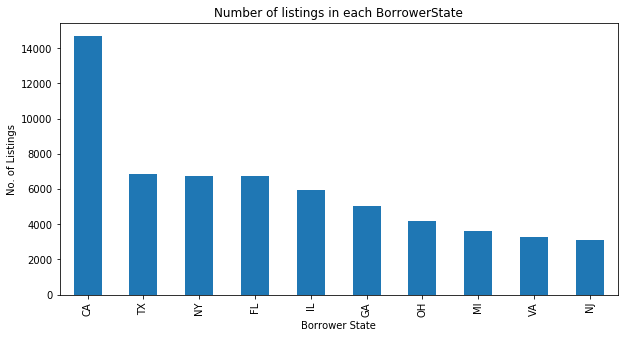

In [6]:
# find the top 10 states borrower
top10_states_borrower=df.BorrowerState.value_counts().head(10)

#create the bar chart
top10_states_borrower.plot.bar(stacked = True , figsize=(10, 5),title='Number of listings in each BorrowerState', grid=False)
                                
plt.xlabel('Borrower State');
plt.ylabel('No. of Listings');


## (Types of profession takes loans the most )

> Professionals are in the top of professin list who have loans 
, then computer programmer , executive and teatchers.

Text(0.5, 1.0, 'Type of the Top5 professin takse loan')

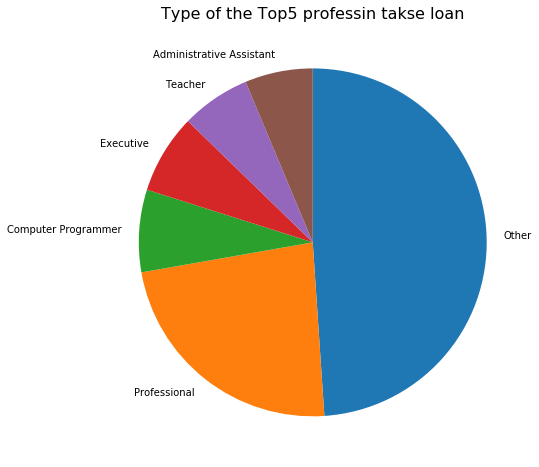

In [7]:
sorted_Occupation = df['Occupation'].value_counts().head(6)

plt.figure(1, figsize=(17,8))
plt.pie(sorted_Occupation, labels = sorted_Occupation.index ,counterclock = False, startangle = 90)

plt.title('Type of the Top5 professin takse loan',fontsize=16)

## (The income range of the borrowers )

> As we can see most of the borrower income range fall between 25k-49k , and the second place comes the income between 50k-75k..etc. As the range of income increase we can notice that the number of listing decrease.

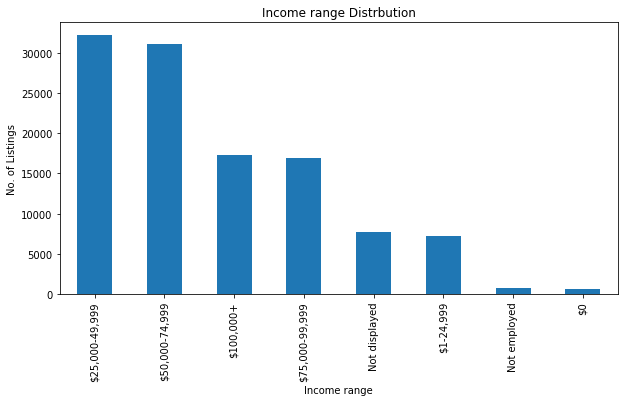

In [8]:
#create the bar chart

income = df.IncomeRange.value_counts()
income.plot.bar(stacked = True , figsize=(10, 5),title='Income range Distrbution', grid= False)
                                
plt.xlabel('Income range'); 
plt.ylabel('No. of Listings');


## (What makes people gets loan for ? )

> Most of the loans has been taken beacuse of Debt Consolidation ,
(we will skip not available and other ) then it comes the Home improvement and busineses , auto..etc.

In [9]:
df.rename(columns = {'ListingCategory (numeric)': 'listing_category'}, inplace= True)

In [10]:
df['listing_category']= (df['listing_category']).astype('str')

#The category of the listing that the borrower selected when posting their listing: 
df['listing_category'].replace({'0': 'Not Available','1': 'Debt Consolidation', '2' : 'Home Improvement',
                                '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use',
                                '6' : 'Auto', '7': 'Other', '8' : 'Baby&Adoption', '9' :'Boat', 
                                '10' : 'Cosmetic Procedure', '11' : 'Engagement Ring', 
                                '12' : 'Green Loans', '13' : 'Household Expenses', 
                                '14' : 'Large Purchases', '15' : 'Medical/Dental', 
                                '16' : 'Motorcycle', '17' : 'RV', '18' : 'Taxes', 
                                 '19' : 'Vacation', '20' : 'Wedding Loans'}, inplace=True)

loan_category= df['listing_category'].value_counts().head(10)

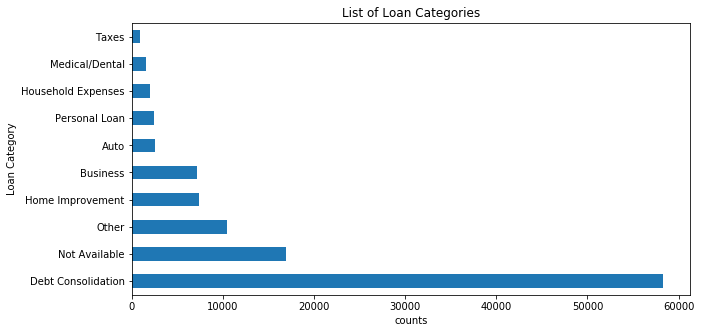

In [11]:
loan_category.plot.barh(stacked = True , figsize=(10, 5),title='List of Loan Categories', grid= False)
                   
plt.xlabel('counts');
plt.ylabel('Loan Category');

## (Employment Status of the borrower )

> Part-time worker are the most people taken loan more than full time worker which is intresting ! self-employed and not employed are having alomst the same percentage.

In [12]:
df2= df.copy()
df2 =df2[df2['LoanStatus']!='Current']
df2["LoanStatus"]=(df2['LoanStatus']=='Completed').astype(int)

Text(0.5, 1.0, 'Employment Status of the borrower')

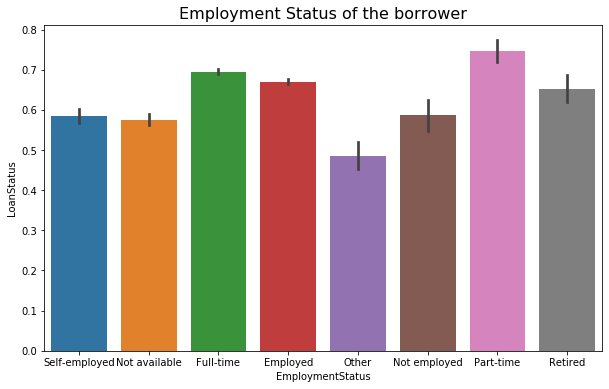

In [13]:
plt.figure(figsize=(10, 6))

sb.barplot(data=df2 ,x="EmploymentStatus", y="LoanStatus")
plt.title('Employment Status of the borrower' , fontsize=16)

## (Is the borrowers home owners? )

> Most of the borrower ara homeowner , eventhough the diffrence between home\non-home owner are small percentage.

Text(0.5, 1.0, 'Is the borrowers home owners?')

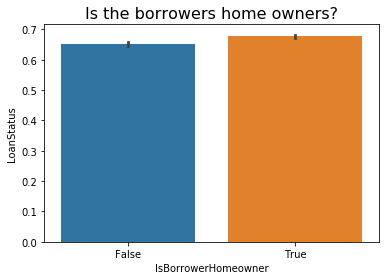

In [14]:
sb.barplot(data= df2 ,x='IsBorrowerHomeowner', y='LoanStatus' )
plt.title('Is the borrowers home owners?' , fontsize=16)

## (The effect of borrower rate over the years )

> From 2005-2006 there is a high jump in the borrower rate by almost 0.10 , then it decrease by small amount in 2007.
    From 2007-2011 the rate keep increase with slight difrences then starts to drops till 2014.

In [15]:
# creat year column bt extracting the year from ListingCreationDate
df['Year'] = df['ListingCreationDate'].str.split('-').str[0]

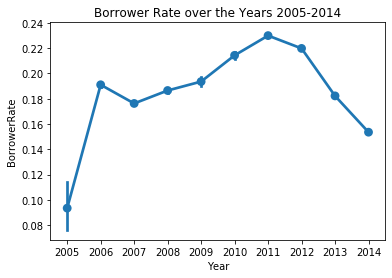

In [16]:
#Create pointplot hart to show the pattern
sb.pointplot(data=df, x='Year', y='BorrowerRate').set_title('Borrower Rate over the Years 2005-2014');

## (How the borrower rate has effect the borrower homeowner over the years ? )

> The Borrower's interest rate for homeowner , we can say there is a slight diffrence from 2006-2009. after that it starts raising till 2011 and it starts falling to 2014. For people with no home ownership , we can notice that there is increses and decreses in the intrest rate between 2006-2010 after that it starts decreses.

Text(0.5, 1.0, 'The effect of borrower rate on the homeownership over the years')

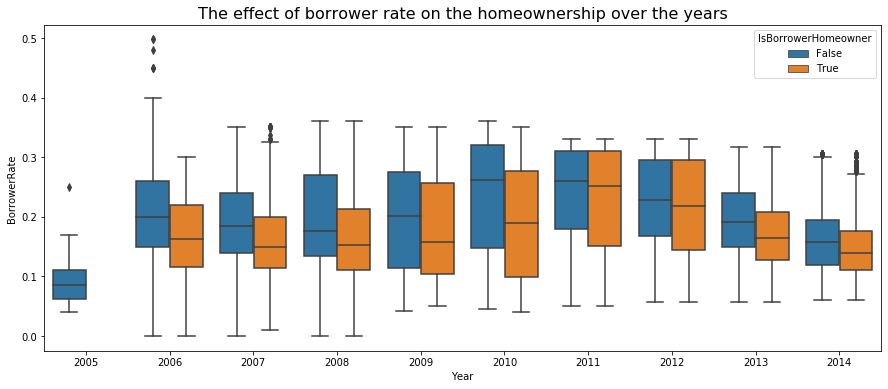

In [17]:
plt.figure(figsize=(15, 6))

sb.boxplot(data=df, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner');
plt.title('The effect of borrower rate on the homeownership over the years', fontsize=16)

## (The effect of borrower rate & Prosper Score on the Monthly Income )

> Higher prosper score (10and above) gets low borrower rate such as in 160k income.On the other hand, low scores gets high borrower rate and that the case for income with =<140k.

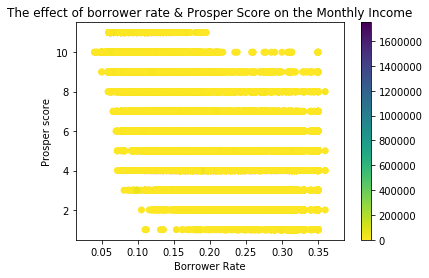

In [18]:
plt.scatter( x = 'BorrowerRate', y = 'ProsperScore', c = 'StatedMonthlyIncome'
           ,data = df, cmap ='viridis_r')

plt.title('The effect of borrower rate & Prosper Score on the Monthly Income')
plt.xlabel('Borrower Rate')
plt.ylabel('Prosper score')
plt.colorbar()

## (Borrwer Income range in respect to Loan Amount vs Term )

> Borrower with income + 100k are taken high amount of loans with laregest term 60 months. In general , 60 moths \ 5 years term is the most one taken in each Borrwer Income.

Text(0.5, 1.0, 'Comparison b\\w Loan Amount - Income range link to the Terms')

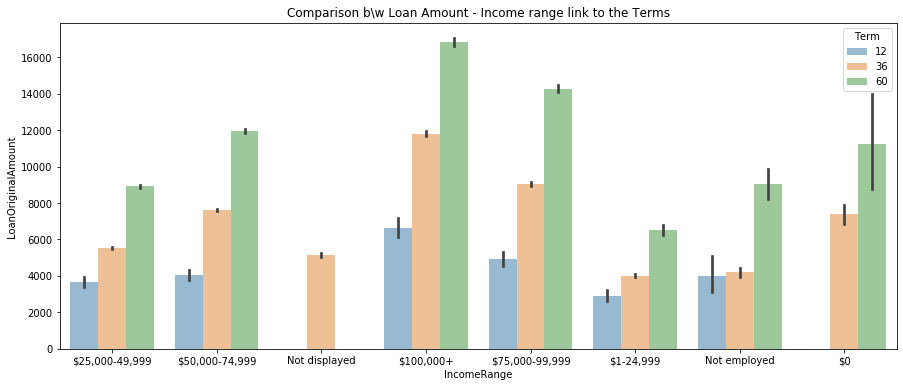

In [20]:
plt.figure(figsize=(15, 6))
sb.barplot(data = df , y = 'LoanOriginalAmount', x = 'IncomeRange', hue = "Term",alpha = 0.5)
plt.title('Comparison b\w Loan Amount - Income range link to the Terms')

In [ ]:
! jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl --post serve